# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


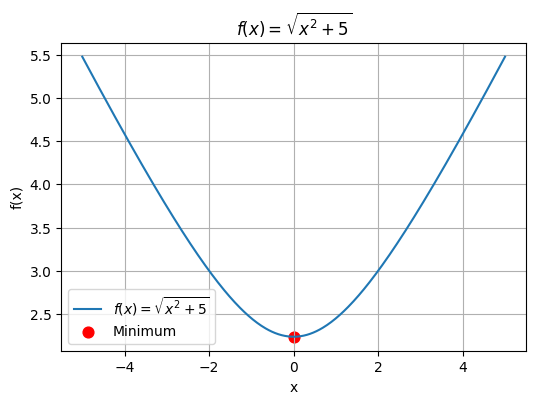

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#function f(x) = sqrt(x^2 + 5)
def f(x):
    return np.sqrt(x**2 + 5)#input x and returns the corresponding f(x) values
x_values = np.linspace(-5, 5, 400)#generates 400 values from range -5 to 5 and plot smooth curve 
y_values = f(x_values)#calculates the function value for each x
plt.figure(figsize=(6,4))
plt.plot(x_values, y_values, label=r"$f(x) = \sqrt{x^2 + 5}$")#plots the function curve 

x_min = 0#the min the fucntion occurs at x=0
y_min = f(0)
plt.scatter(x_min, y_min, color="red", s=60, label="Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"$f(x) = \sqrt{x^2 + 5}$")
plt.grid(True)#adds grid 
plt.legend()
plt.show()



In [ ]:
#Gradient of f(x) = sqrt(x^2 + 5)
def f_grad(x):
    return x / np.sqrt(x**2 + 5)

#Gradient Descent algorithm for minimizing f(x)
#x_0 is the initial starting point
#step_size is the chosen learning rate 
#num_iterations is the number of update steps (T)
def gradient_descent(x_0, step_size, num_iterations):
    x_k_values = [x_0]#this stores all x_k values
    x = x_0#intializes the current value 
    for i in range(num_iterations):#Perform gradient descent for number of iterations
        grad = f_grad(x)#computing the gradient 
        x = x - step_size * grad#updating 
        x_k_values.append(x)#saving the updated value 
    return np.array(x_k_values)#converting list to numpy array 




x_T: 2.7634647137547546e-13


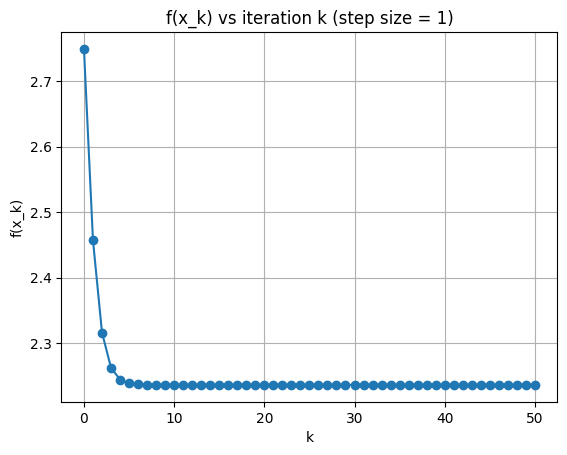

In [ ]:

last_digit = 7 #last digit of student id 
x_0 = 3 / 5 + 1 #Compute initial point x_0 = (last_digit / 5) + 1

step_size = 1.0#learning rate 
num_iterations = 50#no of iterations T

x_k_values = gradient_descent(x_0, step_size, num_iterations)#gradient descent to obtain x_k values
x_T = x_k_values[-1]#extracting x_t values 
print("x_T:", x_T)

k_values = np.arange(len(x_k_values)) #preparing k values for plotting 
f_xk_values = f(x_k_values)#Compute f(x_k) for each iteration

#Plot f(x_k) vs iteration number k
plt.figure()
plt.plot(k_values, f_xk_values, marker="o")
plt.xlabel("k")
plt.ylabel("f(x_k)")
plt.title("f(x_k) vs iteration k (step size = 1)")
plt.grid(True)
plt.show()


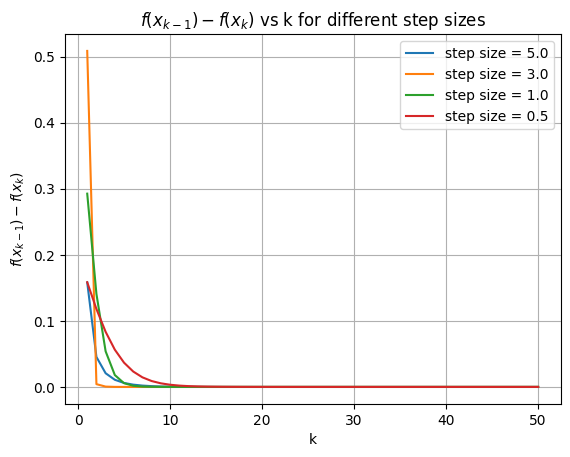

step size 5.0 all f(x_{k-1}) - f(x_k) > 0: True
step size 3.0 all f(x_{k-1}) - f(x_k) > 0: False
step size 1.0 all f(x_{k-1}) - f(x_k) > 0: False
step size 0.5 all f(x_{k-1}) - f(x_k) > 0: True


In [ ]:
step_sizes = [5.0, 3.0, 1.0, 0.5]#step sizes to test 
diff_results = []#this is will store the differences for each step size

for step_size in step_sizes:#running gradient descent for each 
    x_k_values = gradient_descent(x_0, step_size, num_iterations)#compute the sequence of x_k values 
    f_values = f(x_k_values)#Compute f(x_k) for all iterations
    diff_values = f_values[:-1] - f_values[1:]#Compute the difference 
    diff_results.append(diff_values)#Store the difference sequence

#Plotting f(x_{k-1}) - f(x_k) for each step size
plt.figure()
for diff_values, step_size in zip(diff_results, step_sizes):
    k_values = np.arange(1, len(diff_values) + 1)
    plt.plot(k_values, diff_values, label=f"step size = {step_size}")#Plot the difference curve for this step size
plt.xlabel("k")
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")
plt.title(r"$f(x_{k-1}) - f(x_k)$ vs k for different step sizes")
plt.legend()
plt.grid(True)
plt.show()
#Check whether each step size produces a strictly decreasing sequence of f(x_k)
for diff_values, step_size in zip(diff_results, step_sizes):
    is_decreasing = np.all(diff_values > 0)
    print("step size", step_size, "all f(x_{k-1}) - f(x_k) > 0:", is_decreasing)


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.537905260349515
Coefficients: [3.93273605 0.14125564]


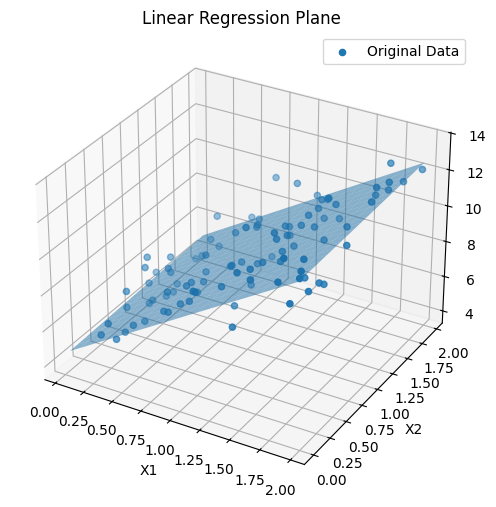

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(63)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

X_b = np.c_[np.ones((100, 1)), X]#add columns of ones to x
#Compute theta using the Normal Equation
#θ=(Xᵀ X)⁻¹ Xᵀ y
theta = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
#extracting the intercept and the two coefficients 
intercept = theta[0]
coefficients = theta[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)
#create 3d figure for plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
#scatter plot
ax.scatter(X[:, 0], X[:, 1], y, label="Original Data")
#generate a grid 
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
y_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)#plotting the regression line

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("Linear Regression Plane")
ax.legend()#show legend 

plt.show()#display the plot 



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Training Set Accuracy: 0.89
Test Set Accuracy: 0.95
Learned weights w: [  9.09641906 -15.2372537 ]
Learned bias b: 6.371309032703907


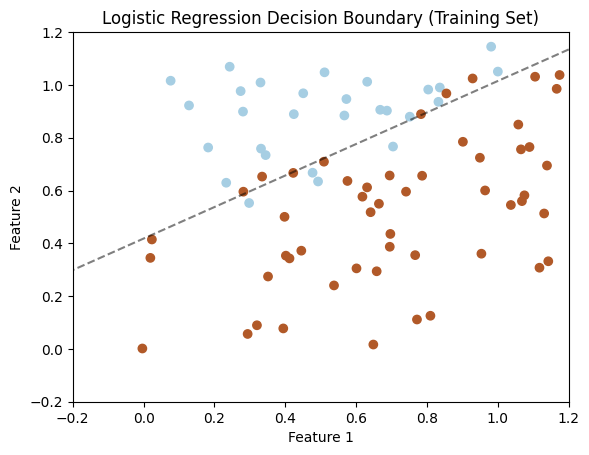

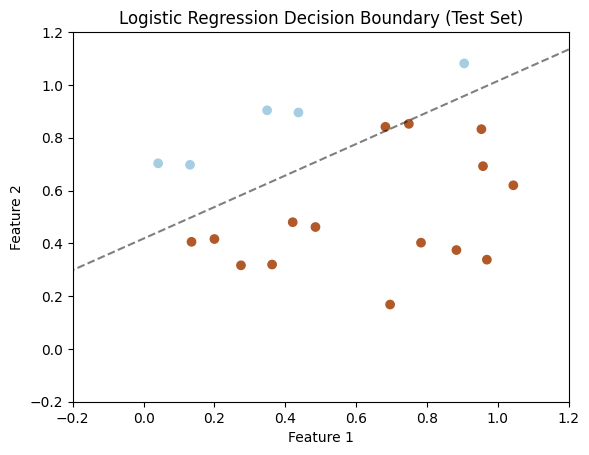

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
#sigmoid function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

np.random.seed(595)
#generates 2d features x
X = np.random.rand(2, 100)
#true underlying parameters 
w_true = np.array([1.5, -2.5])
b_true = 1.0
#computing probabilities 
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
#generating binary labels y
Y = (probabilities > 0.5).astype(int)
#adding noise to the features 
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)
#split into training and testing 
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]
#intializing the model parameters 
w = np.zeros(X.shape[0])
b = 0.0
#these are the hyperparameters for gradient descent 
learning_rate = 0.5
num_epochs = 5000
#Gradient descent loop to learn w and b
for epoch in range(num_epochs):
    Z_train = np.dot(w.T, X_train) + b
    A_train = sigmoid(Z_train)#predicted probabilities
    #gradient of the loss with respect to w and b
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)
    #parameters update
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb
#computing predictions on training 
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)
#computing predictions on testing
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)
#Computing training and test accuracy
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")
print("Learned weights w:", w)
print("Learned bias b:", b)

# ------------------ Plotting decision boundary on training set ------------------ #
#scatter plot of the training data 
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
#current axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create grid of points 
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),
    np.linspace(ylim[0], ylim[1], 50)
)
#computing predicted probabilities 
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
#plotting the decision boundary 
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Set)')
plt.show()

# ------------------ Plotting decision boundary on testing set ------------------ #
#Scatter plot of the test data 
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
#current axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create grid of points 
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),
    np.linspace(ylim[0], ylim[1], 50)
)
#computing predicted probabilities 
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
#plotting the decision boundary 
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Test Set)')
plt.show()



## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5